In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
# from astropy.io import fits

sys.path.append(os.path.expanduser('~/git/Python/useful'))
from desi_plot_spectrum import plot_spectrum

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
cat = Table(fitsio.read('/global/cfs/cdirs/desi/users/raichoor/everest/sv1-elg-everest-healpix.fits'))
print(len(np.unique(cat['TARGETID'])), len(cat))

119904 119904


In [4]:
cat[:1]

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,MEDIAN_COADD_SNR_B,MEDIAN_COADD_SNR_R,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_ELG_R,TSNR2_ELG_Z,TSNR2_ELG,FN,HASCOADD,GTOT,GFIB,GR,RZ,RW1,RW2,ELG_LOP,ELG_VLO,OII_CHI2,OII_NDOF,OII_FLUX,OII_FLUX_IVAR,OII_SHARE,OII_SHARE_IVAR,OII_SIGMA,OII_SIGMA_IVAR,OII_CONT,OII_CONT_IVAR,OII_EW,OII_EW_IVAR,HDELTA_CHI2,HDELTA_NDOF,HDELTA_FLUX,HDELTA_FLUX_IVAR,HDELTA_SHARE,HDELTA_SHARE_IVAR,HDELTA_SIGMA,HDELTA_SIGMA_IVAR,HDELTA_CONT,HDELTA_CONT_IVAR,HDELTA_EW,HDELTA_EW_IVAR,HGAMMA_CHI2,HGAMMA_NDOF,HGAMMA_FLUX,HGAMMA_FLUX_IVAR,HGAMMA_SHARE,HGAMMA_SHARE_IVAR,HGAMMA_SIGMA,HGAMMA_SIGMA_IVAR,HGAMMA_CONT,HGAMMA_CONT_IVAR,HGAMMA_EW,HGAMMA_EW_IVAR,HBETA_CHI2,HBETA_NDOF,HBETA_FLUX,HBETA_FLUX_IVAR,HBETA_SHARE,HBETA_SHARE_IVAR,HBETA_SIGMA,HBETA_SIGMA_IVAR,HBETA_CONT,HBETA_CONT_IVAR,HBETA_EW,HBETA_EW_IVAR,OIII_CHI2,OIII_NDOF,OIII_FLUX,OIII_FLUX_IVAR,OIII_SHARE,OIII_SHARE_IVAR,OIII_SIGMA,OIII_SIGMA_IVAR,OIII_CONT,OIII_CONT_IVAR,OIII_EW,OIII_EW_IVAR,HALPHA_CHI2,HALPHA_NDOF,HALPHA_FLUX,HALPHA_FLUX_IVAR,HALPHA_SHARE,HALPHA_SHARE_IVAR,HALPHA_SIGMA,HALPHA_SIGMA_IVAR,HALPHA_CONT,HALPHA_CONT_IVAR,HALPHA_EW,HALPHA_EW_IVAR,HEALPIX,EXP_EXPID,EXP_PETAL_LOC,EXP_FIBER,EXP_FIBERSTATUS,EXP_PRIORITY,EXP_TILEID,vi_hasvi,vi_zok,vi_best_z,vi_best_quality,vi_best_spectype
int64,float64,float64,float64,float64,int64,int64,str6,str20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,int32,int32,str4,float32,float32,float32,float32,float32,float32,int16,int64,str2,float32,float32,float32,float32,str8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,str200,bool,float32,float32,float32,float32,float32,float32,bool,bool,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,str227,str75,str189,str151,str189,str227,bool,bool,float32,float32,str6
39628203584653535,11516.728364944458,58.8429322332128 .. -2.08402252754139,0.8648628870067216,7.774969092155151e-06,0,7928,GALAXY,,10,2614.9525476694107,0,130.1317216199561,17.509597177198064,0.0,0.0,2021.1047,4123168608002,1,TGT,0.8405902417573833,3,9010,430231,2271,REX,0.57915515,0.9043345,1.8013848,2232.5605,535.69055,105.3732,0,0,,0.0,0.0,0.0,0.0,1301p175,0.024614336,3.7645984,1.3448977,2.8961306,0.6142666,0.39465874,0.6162485,1.2275333,0.39465874,0.6162485,1.2275333,1.0,0.25267783,0.0,0.0,S,3000,1,4123168608002,0,0,0,0,0

In [5]:
cat['EFFTIME_ELG'] = 8.60 * cat['TSNR2_ELG']

# Remove FIBERSTATUS!=0 fibers
mask = cat['COADD_FIBERSTATUS']==0
print('FIBERSTATUS',np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
cat = cat[mask]

# Remove "no data" fibers
mask = cat['ZWARN'] & 2**9==0
print('No data', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
cat = cat[mask]

# Require a minimum depth
min_depth = 3000.
mask = cat['EFFTIME_ELG']>min_depth
print('Min depth', np.sum(mask), np.sum(~mask), np.sum(mask)/len(mask))
cat = cat[mask]

# Quality cut
mask = np.log10(cat['OII_FLUX'] * np.sqrt(cat['OII_FLUX_IVAR'])) > 0.9 - 0.2 * np.log10(cat['DELTACHI2'])
mask &= cat['ZWARN']==0
print('Redshift quality', np.sum(mask), np.sum(~mask), np.sum(mask)/len(mask))
cat = cat[mask]
print(len(cat))

FIBERSTATUS 101026 18878 0.15744262076327728
No data 101020 6 5.939065191138915e-05
Min depth 82434 18586 0.8160166303702238
Redshift quality 57653 24781 0.6993837494237815
57653


In [6]:
# # Select ELG targets
# mask = cat['SV1_DESI_TARGET'] & 2**1 > 0
# cat = cat[mask]
# print(len(cat))

# Redshift cut
mask = (cat['Z']>0.9)
cat = cat[mask]
print(len(cat))

# Exclude spectroscopic quasars
mask = cat['SPECTYPE']!='QSO'
cat = cat[mask]
print(len(cat))

33228
32860


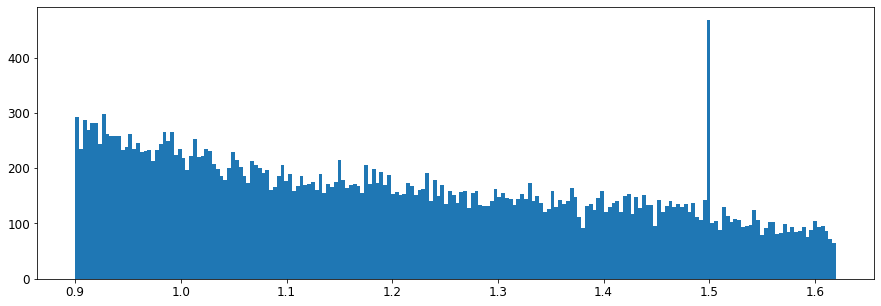

In [7]:
plt.figure(figsize=(15, 5))
plt.hist(cat['Z'], 200)
plt.show()

/global/cfs/cdirs/desi/spectro/redux/everest/healpix/sv1/dark/46/4679/coadd-sv1-dark-4679.fits 39628215123181992
INFO:spectra.py:282:read_spectra: iotime 0.365 sec to read coadd-sv1-dark-4679.fits at 2021-11-10T16:04:45.578869
DEBUG: Read templates from /global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/code/redrock-templates/master
DEBUG: Using default redshift range -0.0050-1.6997 for rrtemplate-galaxy.fits
DEBUG: Using default redshift range 0.0500-5.9934 for rrtemplate-qso.fits
DEBUG: Using default redshift range -0.0020-0.0020 for rrtemplate-star-A.fits
DEBUG: Using default redshift range -0.0020-0.0020 for rrtemplate-star-B.fits
DEBUG: Using default redshift range -0.0020-0.0020 for rrtemplate-star-CV.fits
DEBUG: Using default redshift range -0.0020-0.0020 for rrtemplate-star-F.fits
DEBUG: Using default redshift range -0.0020-0.0020 for rrtemplate-star-G.fits
DEBUG: Using default redshift range -0.0020-0.0020 for rrtemplate-star-K.fits
DEBUG: Using default redshift r

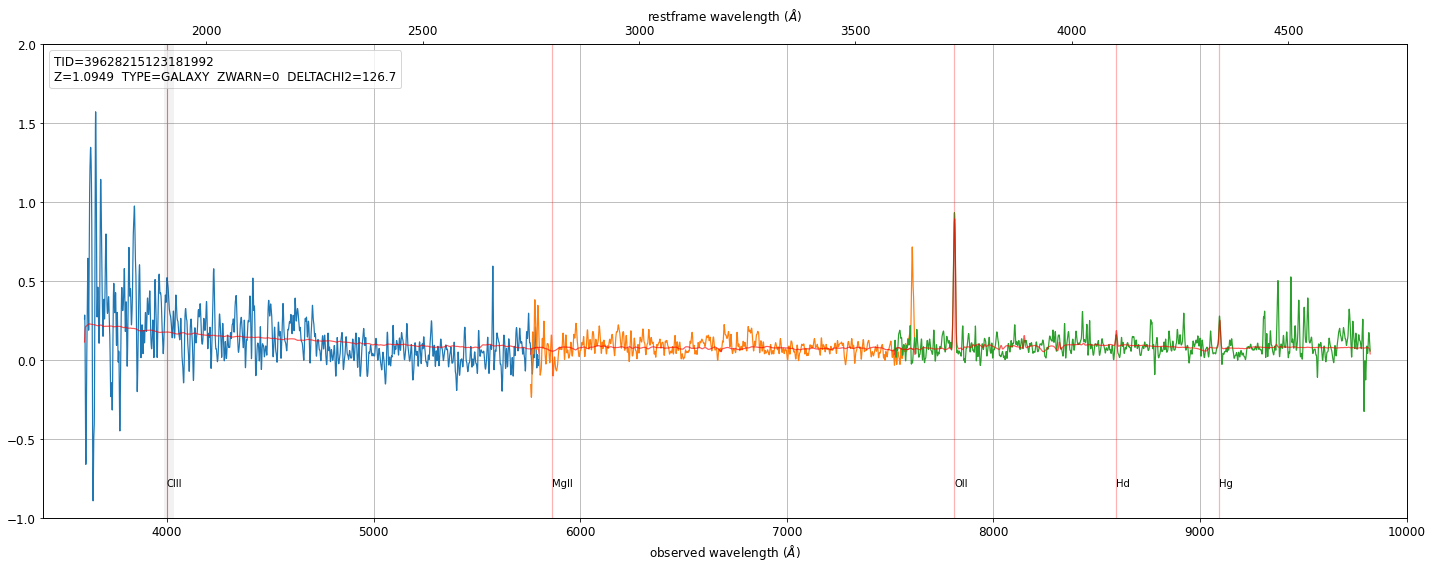

In [8]:
index = 0
coadd_fn = cat['FN'][index].replace('/redrock-', '/coadd-')
tid = cat['TARGETID'][index]
print(coadd_fn, tid)

ax1, ax2 = plot_spectrum(coadd_fn, tid, use_targetid=True, gauss_smooth=3, show_model=True, show=False, return_ax=True)
ax2.axvline(1914, lw=10, color='k', alpha=0.05)
plt.show()

TID=39627793859872775, Line S/N: 0.93
TID=39633173788758209, Line S/N: 2.94
TID=39627142186666900, Line S/N: 0.30
TID=39633476508450967, Line S/N: -0.00
TID=39628501468319462, Line S/N: -0.74
TID=39632934692458612, Line S/N: 1.52
TID=39628517733830076, Line S/N: -1.71
TID=39633559480175902, Line S/N: -1.15
TID=39633562835615889, Line S/N: 0.75
TID=39633152255203056, Line S/N: -1.57
TID=39633004422763335, Line S/N: -0.61
TID=39632930422654453, Line S/N: 0.40
TID=39627944825459813, Line S/N: -2.39
TID=39628526994851274, Line S/N: 0.24
TID=39627817431859477, Line S/N: -1.89
TID=39632931035022210, Line S/N: -2.00
TID=39627179964762357, Line S/N: 1.22
TID=39628422510546941, Line S/N: -0.57
TID=39628526848054115, Line S/N: 0.31
TID=39628527414283643, Line S/N: 2.05
TID=39628527875658160, Line S/N: 1.08
TID=39628034067662995, Line S/N: -2.39
TID=39627147530207528, Line S/N: 1.51
TID=39627829503068497, Line S/N: -0.16
TID=39628141131468532, Line S/N: 1.04
TID=39627147567957084, Line S/N: -0.71

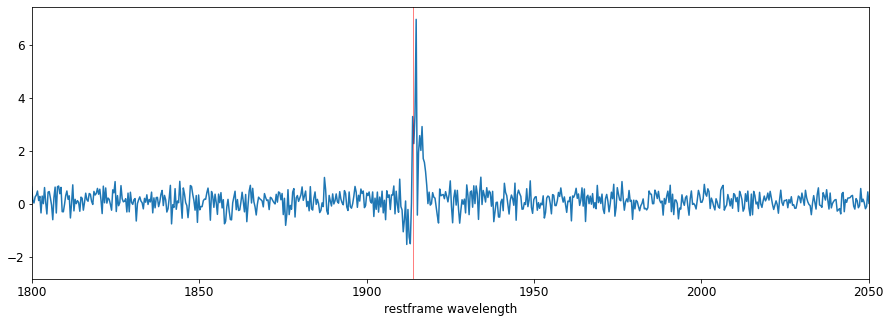

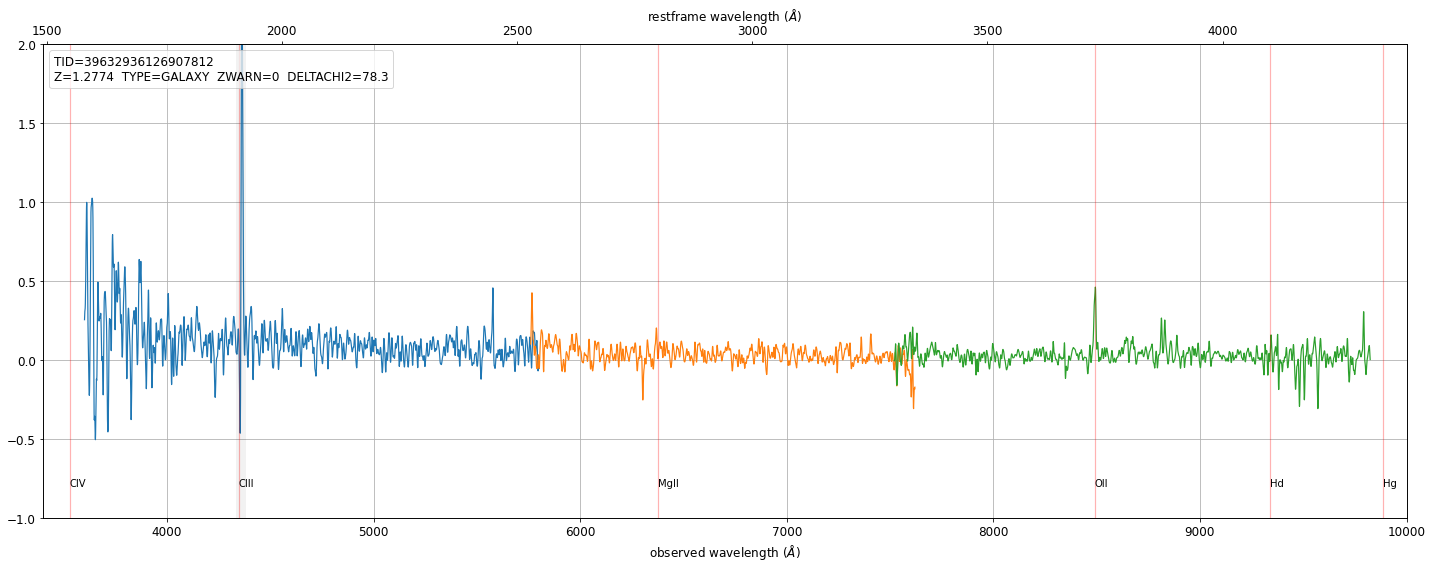

TID=39632974844527452, Line S/N: 0.17
TID=39628523199005124, Line S/N: 1.67
TID=39628516576200320, Line S/N: -2.50
TID=39632949959723612, Line S/N: 0.03
TID=39628528324448301, Line S/N: 2.23
TID=39632936122715854, Line S/N: 0.03
TID=39627823501020676, Line S/N: 0.10
TID=39628501086637250, Line S/N: -1.04
TID=39627769713265890, Line S/N: 1.07
TID=39632934709235994, Line S/N: -1.68
TID=39632950467234335, Line S/N: 0.16
TID=39633282626751359, Line S/N: -0.91
TID=39628417137643559, Line S/N: -2.22
TID=39628145296410036, Line S/N: 0.96
TID=39632940354765163, Line S/N: 1.19
TID=39632950458845957, Line S/N: -2.18
TID=39633282635139637, Line S/N: 0.97
TID=39633112598054215, Line S/N: -0.69
TID=39627962844189674, Line S/N: -0.28
TID=39632949955529413, Line S/N: -1.69
TID=39632960202212131, Line S/N: 0.48
TID=39632979802196771, Line S/N: -1.61
TID=39628516362289990, Line S/N: -0.52
TID=39627805935275346, Line S/N: 0.88
TID=39632950479815024, Line S/N: 0.96
TID=39632955013857593, Line S/N: -0.81


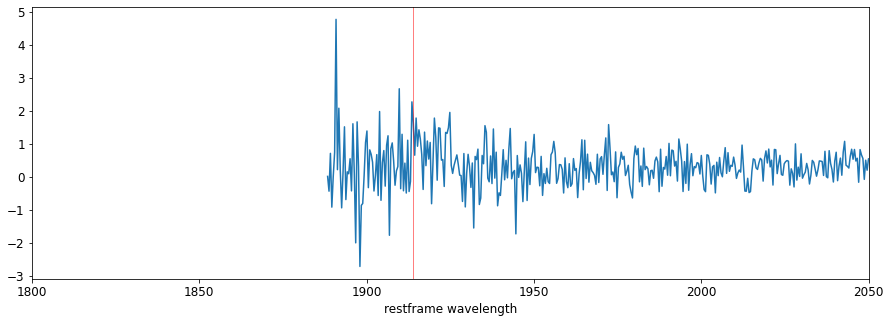

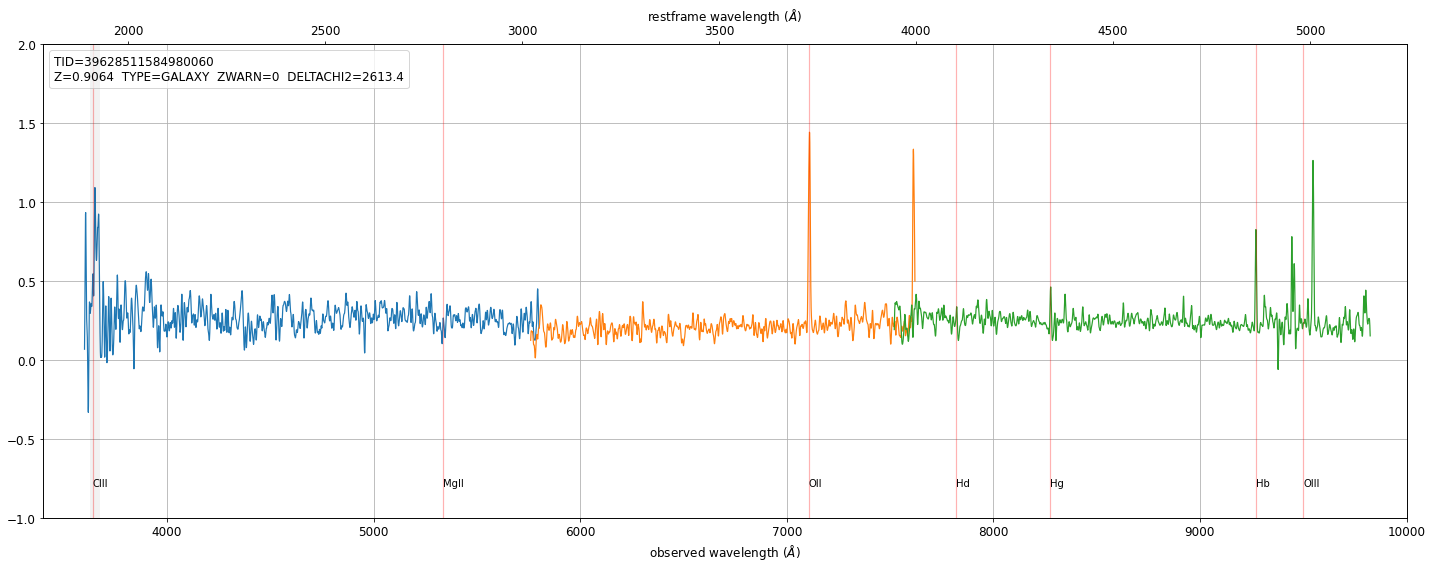

TID=39633004456313325, Line S/N: -1.85
TID=39628162786661035, Line S/N: -0.82
TID=39628255224923674, Line S/N: -0.56
TID=39627877829841016, Line S/N: 0.70
TID=39628501086634797, Line S/N: 1.41
TID=39632955374568975, Line S/N: 0.22
TID=39632960776832835, Line S/N: -1.98
TID=39632951750692893, Line S/N: 1.53
TID=39633271436346620, Line S/N: -0.48
TID=39632944855255650, Line S/N: 0.47
TID=39633290012921409, Line S/N: 0.34
TID=39627980850332164, Line S/N: -1.72
TID=39627640570644268, Line S/N: -0.28
TID=39632994612282638, Line S/N: 0.31
TID=39633089839762937, Line S/N: 0.37
TID=39628016237675974, Line S/N: -0.45
TID=39633182236084084, Line S/N: 2.87
TID=39632935686507893, Line S/N: -1.98
TID=39633271406986447, Line S/N: -1.54
TID=39628521861024043, Line S/N: 0.45
TID=39633354902995369, Line S/N: -1.64
TID=39632950110719338, Line S/N: -1.24
TID=39633117119517479, Line S/N: 0.33
TID=39627158284404408, Line S/N: 0.36
TID=39632949917782688, Line S/N: -1.70
TID=39633275186054092, Line S/N: -0.7

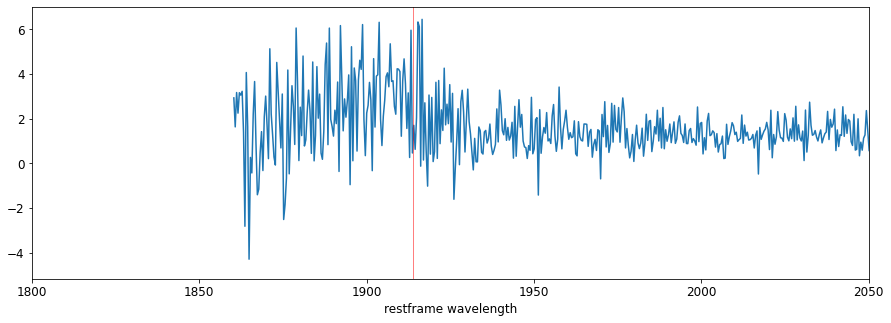

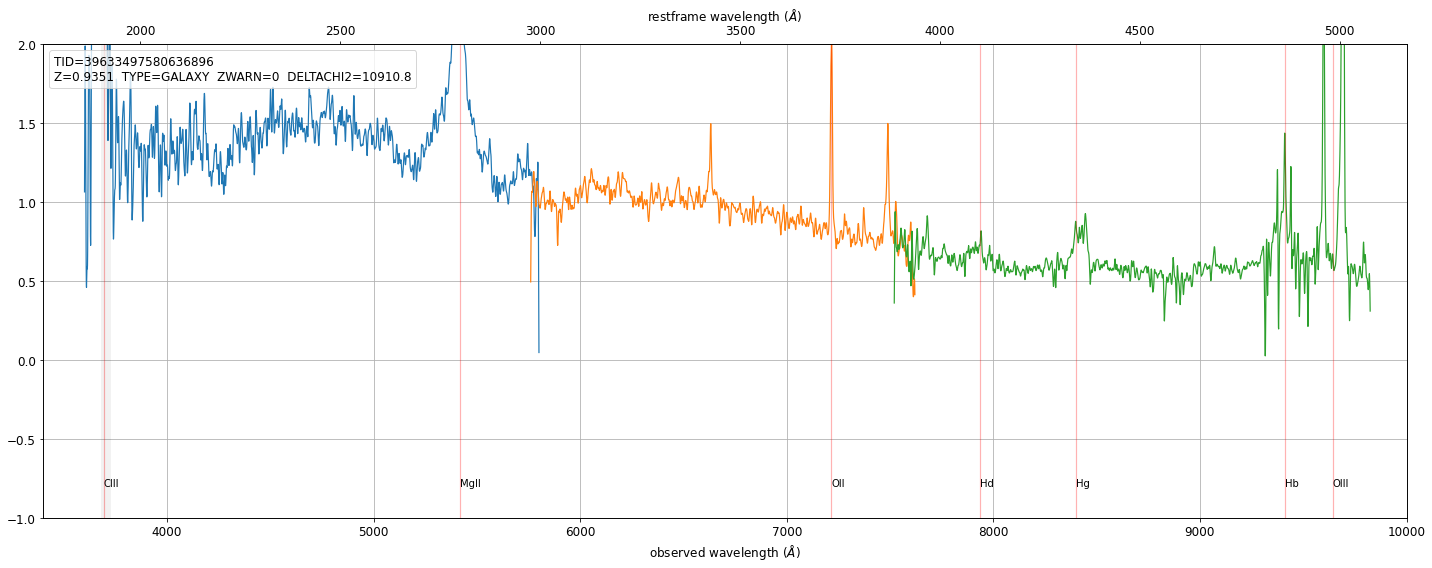

TID=39633489477240663, Line S/N: -1.00
TID=39633567055089435, Line S/N: -2.63
TID=39633134748177650, Line S/N: 0.52
TID=39632945257907695, Line S/N: -2.30
TID=39628511274601189, Line S/N: 2.05
TID=39632936097546458, Line S/N: 0.37
TID=39628505813616279, Line S/N: 0.79
TID=39632945404709444, Line S/N: -0.02
TID=39632945408904253, Line S/N: -1.34
TID=39627950869449989, Line S/N: 0.70
TID=39627781797055412, Line S/N: -1.47
TID=39633478748211944, Line S/N: -1.52
TID=39633345046381043, Line S/N: -1.45
TID=39627841591054754, Line S/N: 0.89
TID=39628512449008180, Line S/N: -1.05
TID=39632935699087702, Line S/N: -0.49
TID=39628517721246348, Line S/N: -1.01
TID=39633478739821739, Line S/N: 0.11
TID=39633435077117298, Line S/N: -1.34
TID=39628147305483645, Line S/N: -0.46
TID=39632939847256060, Line S/N: 1.08
TID=39627944850624327, Line S/N: 1.42
TID=39627152915696399, Line S/N: 1.95
TID=39628146965742118, Line S/N: -0.03
TID=39633290033889852, Line S/N: 2.17
TID=39627968863012912, Line S/N: 0.8

TID=39633558590980872, Line S/N: 0.02
TID=39628521307377425, Line S/N: -0.52
TID=39627142182471813, Line S/N: 1.49
TID=39628511417207217, Line S/N: -0.88
TID=39628127730668780, Line S/N: -1.05
TID=39628127739056049, Line S/N: -0.00
TID=39632935497762856, Line S/N: -0.00
TID=39633567050892038, Line S/N: 0.08
TID=39628427887643554, Line S/N: 2.56
TID=39633286326128572, Line S/N: -2.82
TID=39627769717459031, Line S/N: 1.03
TID=39628522716662911, Line S/N: -0.24
TID=39627179964763123, Line S/N: -1.39
TID=39628164825092906, Line S/N: -0.33
TID=39632929822870314, Line S/N: -2.16
TID=39628517763190391, Line S/N: -2.95
TID=39632941671776808, Line S/N: 0.68
TID=39628226594605056, Line S/N: -0.73
TID=39633182240279902, Line S/N: 0.77
TID=39627865771213728, Line S/N: -1.00
TID=39633489481436299, Line S/N: -0.96
TID=39632941168462488, Line S/N: -0.72
TID=39628390008881594, Line S/N: -0.84
TID=39633085255385982, Line S/N: -2.89
TID=39632955752055854, Line S/N: 1.22
TID=39628527221343043, Line S/N: 

In [9]:
np.random.seed(512)
idx = np.random.choice(len(cat), size=500, replace=False)

for index in idx:

    coadd_fn = cat['FN'][index].replace('/redrock-', '/coadd-')
    tid = cat['TARGETID'][index]

    redshifts = Table(fitsio.read(coadd_fn.replace('/coadd-', '/redrock-'), ext='REDSHIFTS'))
    coadd_index = np.where(redshifts['TARGETID']==tid)[0][0]
    
    wave = fitsio.read(coadd_fn, ext='B_WAVELENGTH')
    flux = fitsio.read(coadd_fn, ext='B_FLUX')[coadd_index]
    msk = fitsio.read(coadd_fn, ext='B_MASK')[coadd_index]
    ivar = fitsio.read(coadd_fn, ext='B_IVAR')[coadd_index]
    z = redshifts['Z'][coadd_index]

    wave_rest = wave/(1+z)
    line = 1914.
    
    # Window for measuring line flux
    mask_line = (wave_rest>=line-2) & (wave_rest<=line+2)
    mask_line &= (msk==0)
    
    # Window for measuring the continuum
    mask_line_continuum = (~mask_line) & (wave_rest>line-100) & (wave_rest<line+100)
    mask_line_continuum &= (msk==0)

    line_flux_raw = np.sum(flux[mask_line])
    line_continuum = np.mean(flux[mask_line_continuum]) * np.sum(mask_line)
    line_flux = line_flux_raw - line_continuum
    line_flux_ivar = np.median(ivar[mask_line_continuum]) / np.sum(mask_line)
    line_sn = line_flux * np.sqrt(line_flux_ivar)
    print('TID={}, Line S/N: {:.2f}'.format(tid, line_sn))
        
    # Only plot spectra with S/N>3
    if line_sn>3:
        
        plt.figure(figsize=(15, 5))
        plt.plot(wave_rest[msk==0], flux[msk==0])
        plt.xlabel('restframe wavelength')
        plt.axvline(1914, color='r', lw=1, alpha=0.5)
        plt.xlim(1800, 2050)
        plt.show()
        
        print()

        ax1, ax2 = plot_spectrum(coadd_fn, tid, use_targetid=True, gauss_smooth=3, show_model=False, show=False, return_ax=True)
        ax2.axvline(1914, lw=10, color='k', alpha=0.05)
        plt.show()